### 操作字符串的一种逻辑公式

In [9]:
import re
import pandas as pd

In [2]:
s='http://www.neilopenai.com'
reg='http://[w]{3}.[a-z0-9].com'
re.findall(reg,s)

[]

In [6]:
#转义字符 \
s='人工智能http://www.neilopenai.com'
reg='http://[w]{3}\.[a-z0-9]*\.com'
re.findall(reg,s)

['http://www.neilopenai.com']

In [7]:
#unicode汉字编码 \u4e00-\u9fa5
re.findall('[\u4e00-\u9fa5]',s)

['人', '工', '智', '能']

In [11]:
#正则可以直接识别原始文本
s='hello world'
re.findall('hello',s)

['hello']

In [12]:
#findall意找出所有匹配字符
re.findall('o',s)

['o', 'o']

#### 元字符
|字符|说明|
|--|--|
|.|代表的时换行符以外的任意字符。换行符是：\n \r\n|
|\w|匹配字母、数字、下划线、汉字的一个字符|
|\s|匹配任意的空白符|
|\d|匹配数字|
|^|匹配字符串的开始|
|$|匹配字符串的结束|

In [14]:
#范围匹配
s='1a2b3c'
re.findall('[1-3]',s)

['1', '2', '3']

In [15]:
#范围匹配
s='1a2b3c'
re.findall('[1-3a-c]',s)

['1', 'a', '2', 'b', '3', 'c']

#### 反义代码
##### 反义代码表示与元字符相反的代码
- \W 匹配不是字母、数字、下划线、汉字的一个字符
- \S 匹配任意不是空白符的字符
- \D 匹配任意不是数字的字符

#### 限定符
|符号|说明|
|--|--|
|*|代表重复0次或者多次|
|+|代表重复1次或者多次|
|？|代表重复0次或者1次|
|{n}|重复n次|
|{n,}重复n次或更多次数|
|{n,m}|重复n次到m次|

In [36]:
s='http://www.neilopenai.com'
#以http开头
reg='^http://[w]{3}\.[a-z0-9]*\.com'
re.findall(reg,s)

['http://www.neilopenai.com']

In [19]:
s='http://www.neilopenai.com'
#以com结尾
reg='http://[w]{3}\.[a-z0-9]*\.com$'
re.findall(reg,s)

['http://www.neilopenai.com']

In [26]:
##匹配qq号
s='我的qq号是42197393'
re.findall('[\d]+',s)

['42197393']

In [27]:
##匹配qq号
s='我的qq号是42197393'
re.findall('\d+',s)

['42197393']

In [28]:
##匹配qq号
s='我的qq号是42197393'
re.findall('\d',s)

['4', '2', '1', '9', '7', '3', '9', '3']

In [37]:
#匹配手机号
s='联系方式：@13841928367@'
re.findall('\d{11}',s)

['13841928367']

#### 分组匹配

In [210]:
s='我的QQ号是3433849585,我的邮编是10000我的QQ号是34338585,我的邮编是100'
#re.findall('\d+',s)
reg='(\d{10})\,\w*(\d{5})'
re.search(reg,s)

<re.Match object; span=(6, 41), match='3433849585,我的邮编是10000我的QQ号是34338585'>

In [211]:
re.search(reg,s).group()

'3433849585,我的邮编是10000我的QQ号是34338585'

In [212]:
re.search(reg,s).group(0)

'3433849585,我的邮编是10000我的QQ号是34338585'

In [213]:
re.search(reg,s).group(1)

'3433849585'

In [214]:
re.search(reg,s).group(2)

'38585'

In [216]:
#Match
s='hellohello'
#re.findall('\d+',s)
reg='h'
re.match(reg,s)

<re.Match object; span=(0, 1), match='h'>

In [169]:
#默认返回第一个hello
re.match(reg,s).group()

'hello'

#### findall/ search / match 区别
- findall 查找文本中所有符合正则的字符块
- search 查找文本中第一次符合正则模式的字符块 可配合分组匹配 对于某字符出现的次数最好精确指定
- match 查找并返回从开头开始第一次符合匹配正则模式的字符块，第二次出现的不返回

#### 贪婪与非贪婪

- 贪婪：尽可能多的匹配
- 非贪婪：尽可能少的匹配
- 非贪婪操作符：限定符后面加？

In [4]:
s='helloworldddddddd'
reg='helloworld*'
re.search(reg,s).group()

'helloworldddddddd'

In [5]:
#*是匹配0次或多次，非贪婪操作匹配0次
s='helloworldddddddd'
reg='helloworld*?'
re.search(reg,s).group()

'helloworl'

In [7]:
s='helloworldddddddd'
reg='helloworld?'
re.search(reg,s).group()

'helloworld'

In [8]:
#?匹配0次或1次，非贪婪操作匹配0次
s='helloworldddddddd'
reg='helloworld??'
re.search(reg,s).group()

'helloworl'

#### 分支匹配
- 分支匹配原则，前面的条件尽可能匹配少的数据（更精细）， 后面的条件匹配多的数据(更粗）

In [42]:
csv=pd.read_csv(r'C:\数据练习\使用正则进行数据的复杂筛选\旅游.csv',index_col=0)

In [43]:
csv

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,宁波,九寨沟,2085.0,562.0,宁波-九寨沟3天2晚 | 入住黑水县达古冰山国际大酒店 + 成都航空/四川航空往...,黑水县达古冰山国际大酒店 豪华型 3.9分/5分,B区豪华标间(双床) 双床 不含早 1间2晚,成都航空 EU2730,经停,19:45-00:45,四川航空 3U8927,经停,07:55-12:15
5096,成都,泸沽湖,1158.0,376.0,成都-泸沽湖3天2晚 | 入住丽江望月阁客栈 + 成都航空往返机票,丽江望月阁客栈 经济型 4.6分/5分,标准双人间-不含早（预... 双床 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
5097,天津,丽江,1616.0,426.0,天津-丽江3天2晚 | 入住丽江凡间度假连锁客栈青旅店 + 天津航空/首都航空往...,丽江凡间度假连锁客栈青旅店 经济型 4.5分/5分,大床房-预付 大床 不含早 1间2晚,天津航空 GS7861,直飞,16:25-19:45,首都航空 JD5739,直飞,07:50-10:50
5098,大连,重庆,1703.0,446.0,大连-重庆3天2晚 | 入住重庆酉阳锦宏大酒店 + 华夏航空/山东航空往返机票,重庆酉阳锦宏大酒店 舒适型 4.0分/5分,特惠房(大床) 大床 不含早 1间2晚,华夏航空 G52762,经停,18:25-23:30,山东航空 SC4837,经停,07:00-11:30


In [36]:
# | 或分支
reg='\d{3}|,5\d{4}'

re.findall(reg,'123dsifudsiusidf,57659')

['123', ',57659']

#### 零宽断言
- 匹配“正则表达式reg”前面的位置(?=reg)
- 匹配“正则表达式reg”后面的位置(?<=reg)

In [37]:
s='hello,http:\\,100000'
#匹配http前面的逗号
reg=',(?=http)'
re.findall(reg,s)

[',']

In [40]:
s='hello,http:\\,100000,'
#匹配100000后面的逗号
reg='(?<=100000),'
re.findall(reg,s)

[',']

#### 案例

In [44]:
csv

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,宁波,九寨沟,2085.0,562.0,宁波-九寨沟3天2晚 | 入住黑水县达古冰山国际大酒店 + 成都航空/四川航空往...,黑水县达古冰山国际大酒店 豪华型 3.9分/5分,B区豪华标间(双床) 双床 不含早 1间2晚,成都航空 EU2730,经停,19:45-00:45,四川航空 3U8927,经停,07:55-12:15
5096,成都,泸沽湖,1158.0,376.0,成都-泸沽湖3天2晚 | 入住丽江望月阁客栈 + 成都航空往返机票,丽江望月阁客栈 经济型 4.6分/5分,标准双人间-不含早（预... 双床 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
5097,天津,丽江,1616.0,426.0,天津-丽江3天2晚 | 入住丽江凡间度假连锁客栈青旅店 + 天津航空/首都航空往...,丽江凡间度假连锁客栈青旅店 经济型 4.5分/5分,大床房-预付 大床 不含早 1间2晚,天津航空 GS7861,直飞,16:25-19:45,首都航空 JD5739,直飞,07:50-10:50
5098,大连,重庆,1703.0,446.0,大连-重庆3天2晚 | 入住重庆酉阳锦宏大酒店 + 华夏航空/山东航空往返机票,重庆酉阳锦宏大酒店 舒适型 4.0分/5分,特惠房(大床) 大床 不含早 1间2晚,华夏航空 G52762,经停,18:25-23:30,山东航空 SC4837,经停,07:00-11:30


In [60]:
#要的部分写进括号
csv['酒店评分']=csv['酒店'].str.extract('(\d\.\d)分')

In [48]:
csv

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,宁波,九寨沟,2085.0,562.0,宁波-九寨沟3天2晚 | 入住黑水县达古冰山国际大酒店 + 成都航空/四川航空往...,黑水县达古冰山国际大酒店 豪华型 3.9分/5分,B区豪华标间(双床) 双床 不含早 1间2晚,成都航空 EU2730,经停,19:45-00:45,四川航空 3U8927,经停,07:55-12:15,3.9
5096,成都,泸沽湖,1158.0,376.0,成都-泸沽湖3天2晚 | 入住丽江望月阁客栈 + 成都航空往返机票,丽江望月阁客栈 经济型 4.6分/5分,标准双人间-不含早（预... 双床 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.6
5097,天津,丽江,1616.0,426.0,天津-丽江3天2晚 | 入住丽江凡间度假连锁客栈青旅店 + 天津航空/首都航空往...,丽江凡间度假连锁客栈青旅店 经济型 4.5分/5分,大床房-预付 大床 不含早 1间2晚,天津航空 GS7861,直飞,16:25-19:45,首都航空 JD5739,直飞,07:50-10:50,4.5
5098,大连,重庆,1703.0,446.0,大连-重庆3天2晚 | 入住重庆酉阳锦宏大酒店 + 华夏航空/山东航空往返机票,重庆酉阳锦宏大酒店 舒适型 4.0分/5分,特惠房(大床) 大床 不含早 1间2晚,华夏航空 G52762,经停,18:25-23:30,山东航空 SC4837,经停,07:00-11:30,4.0


In [58]:
csv['酒店等级']=csv['酒店'].str.extract('(\w{2}型)')

In [59]:
csv

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,酒店等级
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,宁波,九寨沟,2085.0,562.0,宁波-九寨沟3天2晚 | 入住黑水县达古冰山国际大酒店 + 成都航空/四川航空往...,黑水县达古冰山国际大酒店 豪华型 3.9分/5分,B区豪华标间(双床) 双床 不含早 1间2晚,成都航空 EU2730,经停,19:45-00:45,四川航空 3U8927,经停,07:55-12:15,3.9,豪华型
5096,成都,泸沽湖,1158.0,376.0,成都-泸沽湖3天2晚 | 入住丽江望月阁客栈 + 成都航空往返机票,丽江望月阁客栈 经济型 4.6分/5分,标准双人间-不含早（预... 双床 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.6,经济型
5097,天津,丽江,1616.0,426.0,天津-丽江3天2晚 | 入住丽江凡间度假连锁客栈青旅店 + 天津航空/首都航空往...,丽江凡间度假连锁客栈青旅店 经济型 4.5分/5分,大床房-预付 大床 不含早 1间2晚,天津航空 GS7861,直飞,16:25-19:45,首都航空 JD5739,直飞,07:50-10:50,4.5,经济型
5098,大连,重庆,1703.0,446.0,大连-重庆3天2晚 | 入住重庆酉阳锦宏大酒店 + 华夏航空/山东航空往返机票,重庆酉阳锦宏大酒店 舒适型 4.0分/5分,特惠房(大床) 大床 不含早 1间2晚,华夏航空 G52762,经停,18:25-23:30,山东航空 SC4837,经停,07:00-11:30,4.0,舒适型


In [61]:
zufang=pd.read_csv(r'C:\数据练习\使用正则进行数据的复杂筛选\租房.csv')

In [62]:
zufang

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c7145a5397be4c5251a4873,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租
1,5c714bb4397be4c5251a65c3,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租
2,5c72b1e9397be4c5251e36fd,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租
3,5c712d6c397be4c5251a015f,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租
4,5c714974397be4c5251a5afb,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,5c727614397be4c5251d7be7,2,5,亚运城,广州,番禺,NaN,南,1,公寓 精装 独立阳台 随时看房,合租 · 亚运城天荟 5室1厅https://m.lianjia.com/chuzu/gz/...,30,1380,元/月,亚运城天荟,合租
8405,5c71abea397be4c5251b95c1,1,1,岑村,广州,天河,NaN,东,0,独栋公寓 押一付一,悦橄榄公寓 富祥店 B201 开间https://m.lianjia.com/chuzu/g...,15,400,元/月,NaN,整租
8406,5c7262ba397be4c5251d4973,1,3,白江,广州,增城,73.0,南,2,近地铁,新塘新世界花园万象苑 3室2厅 2500元https://m.lianjia.com/chu...,95,2500,元/月,新塘新世界花园万象苑,整租
8407,5c725b86397be4c5251d35ce,1,2,太和,广州,白云,NaN,南,1,独栋公寓,爱加公寓 营溪店 特惠C两房一厅1号 二居+https://m.lianjia.com/ch...,65,800,元/月,NaN,整租


In [82]:
zufang['house_title'].str.extract('(https://.*)')

,0
0,https://m.lianjia.com/chuzu/bj/zufang/BJ218966...
1,https://m.lianjia.com/chuzu/bj/zufang/BJ219100...
2,https://m.lianjia.com/chuzu/bj/zufang/BJ217730...
3,https://m.lianjia.com/chuzu/bj/zufang/BJ211269...
4,https://m.lianjia.com/chuzu/bj/zufang/BJ212014...
...,...
8404,https://m.lianjia.com/chuzu/gz/zufang/GZ209759...
8405,https://m.lianjia.com/chuzu/gz/apartment/layou...
8406,https://m.lianjia.com/chuzu/gz/zufang/GZ216267...
8407,https://m.lianjia.com/chuzu/gz/apartment/layou...


In [77]:
#文本拼接
#axis=1 在apply方法中代表拿一行做处理
def str_concat(a,b):
    return str(a)+'室'+str(b)+'厅'
zufang.apply(lambda x:str_concat(x['bathroom_num'],x['hall_num']),axis=1)

0       1室1厅
1       2室2厅
2       2室2厅
3       1室1厅
4       1室1厅
        ... 
8404    2室1厅
8405    1室0厅
8406    1室2厅
8407    1室1厅
8408    3室2厅
Length: 8409, dtype: object

In [78]:
pinglun=pd.read_csv(r'C:\数据练习\使用正则进行数据的复杂筛选\评论.csv')

In [79]:
pinglun

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
...,...,...,...,...,...
1995,差评，差的一塌糊涂，千万别买，上当了，,2016-11-25 14:57:52,沫沫19900404,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1996,热水器还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目...,2016-11-25 13:39:28,j***l,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1997,好不容易网购一下还漏电,2016-11-25 13:38:49,K***T,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1998,东西送的挺快，后期报装2天还没人联系我，售后太差,2016-11-25 10:19:20,j***p,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg


In [80]:
pinglun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2000 non-null   object
 1   creationTime   2000 non-null   object
 2   nickname       2000 non-null   object
 3   referenceName  2000 non-null   object
 4   content_type   2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


In [85]:
time=pinglun['creationTime'].str.extract('(\d{2}:\d{2}:\d{2})')

In [86]:
time

,0
0,13:01:54
1,10:45:33
2,10:58:33
3,20:22:33
4,09:19:16
...,...
1995,14:57:52
1996,13:39:28
1997,13:38:49
1998,10:19:20


In [88]:
hours=time[0].str.extract('(^\d\d):')

In [89]:
hours

,0
0,13
1,10
2,10
3,20
4,09
...,...
1995,14
1996,13
1997,13
1998,10


In [94]:
df_hours=pd.DataFrame(hours.value_counts(),columns=['count'])

In [98]:
df_hours.index.name='hours'

In [99]:
df_hours

,count
0,
10,149
11,140
20,132
17,126
21,125
14,125
13,123
16,121
15,117


In [100]:
pinglun['hours']=hours

In [101]:
pinglun

,content,creationTime,nickname,referenceName,content_type,hours
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,13
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,20
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,09
...,...,...,...,...,...,...
1995,差评，差的一塌糊涂，千万别买，上当了，,2016-11-25 14:57:52,沫沫19900404,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg,14
1996,热水器还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目...,2016-11-25 13:39:28,j***l,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg,13
1997,好不容易网购一下还漏电,2016-11-25 13:38:49,K***T,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg,13
1998,东西送的挺快，后期报装2天还没人联系我，售后太差,2016-11-25 10:19:20,j***p,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg,10


<AxesSubplot:xlabel='hours'>

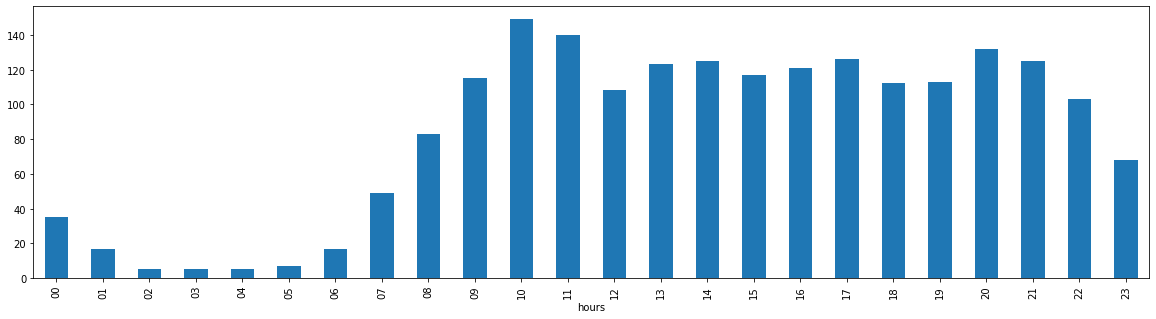

In [108]:
pinglun.groupby(by='hours').count()['content'].plot(kind='bar',figsize=(20,5))

#### 词云

In [118]:
context=''
for sentence in pinglun['content']:
    context+=sentence

In [119]:
context

'东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什么问题，值得拥有！安装师傅很给力，热水器也好用，感谢美的。还没安装，基本满意电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可以24小时有热水了，京东自营值得信赖，值得推荐京东自营。用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮我联系安装，非常感谢售后大姐的服务！下次购买还会考虑美的！物美价廉啊，特别划算的，而且加热速度快。家里用着不错特别方便价格合理，配置挺高，物美价值老师按装是快的，装修中。没试。希望是正常的！五分是习惯\r\n送的快，装的也快，很好，不过装修进行中，为了吊顶只装了热水器，其它后话吧。\r\n我也是醉了，热水器遥控器没电池，还是安装哥车里有一个备用的给装上了。\r\n要赠送的电动牙刷，空气净化器等待配送中&hellip;&hellip;。\r\n一天时间冰箱降100、洗衣机降40、热水器降100、小厨宝降30、烟灶套降100。不过客服说上报解决，电话通知等待中&hellip;&hellip;安装的小哥非常好，工作很尽心，我们家是老房子，安装比一般家要费力。安装的非常不错。因为整栋楼要用热水，裙子只能这样装。给小哥点个赞。热水器已经买二个了，一如既往地好用。美的大品牌，质量非常好前天下单买的今天就用上了，目前没有发现问题，比街上卖的便宜很多，店家都说和网上比他家贵很多，我当老板面直接在网上比的?冲着3000元以内1.5变频1级能效，制冷效果还不错。很好以后还在京东购物，我去别的电器问我这型号，说没有我这个型号，有相识的，1299元\r\n，\r\n买家电的还说我这下线了，安装师傅说，我是普通的挺好的。加热很快，购物很满意，还没走用，安装费花179元，热水器带的喷头不能用槊料的，得自己买花伞。安装还得80 元。\r\n麻烦啊，物流非常快，早上送来的，中午就可以安装了，安装时候也非常认真安装师傅非常认真，负责任，热水器刚开始用，还不知道效果怎么样，但是售后确实挺好各方面都很满意，从价格，产品质量，货运，安装调试，工作人员服务态度方面，还有售后服务。挺好的，收费安装速度很快，管道走的也整齐，不错用了好几天了，才想起来晒单，差点忘了，这款热水器很好，我很喜欢?已经安装但还没用 

In [140]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [123]:
#切割文本至词汇 以列表形式
words=jieba.lcut(context)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.888 seconds.
Prefix dict has been built successfully.


In [128]:
#用空格将词汇列表拼接
words=' '.join(words)

In [138]:
wc=WordCloud.generate(WordCloud(font_path=r'C:/Windows/Fonts/simhei.ttf'),text=words)

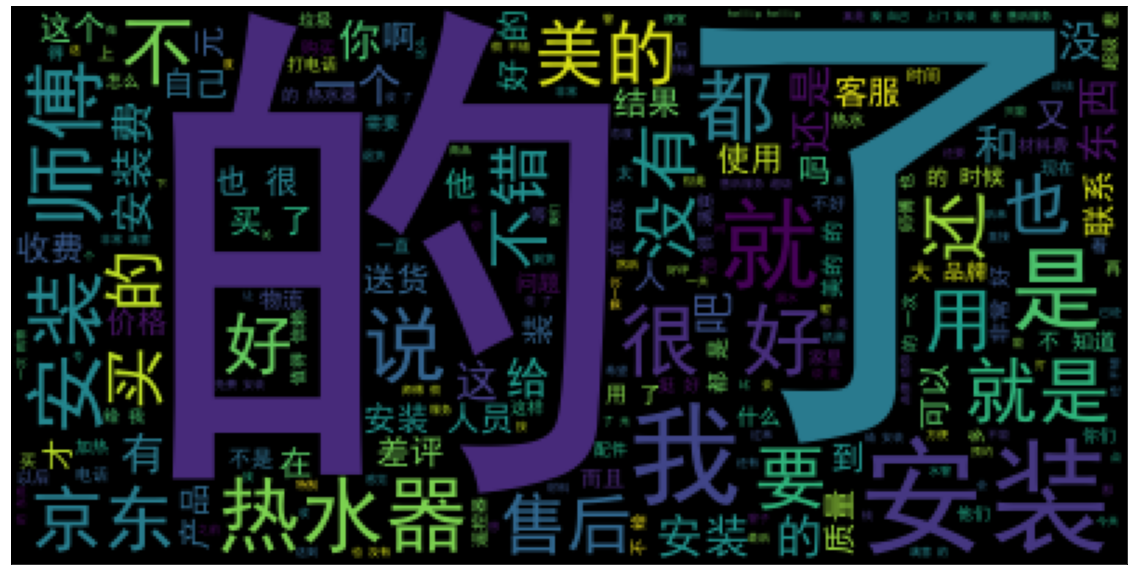

In [168]:
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
plt.savefig(r'C:\Users\User\Desktop\词云.jpg',dpi=300)
plt.show()

In [169]:
'a'*3

'aaa'